Contagem principal de tipos de deploy:
tipo_deploy
ambos               52
single              19
não especificado    17
multi                5
outros               2
Name: count, dtype: int64 

Contagem de deploys específicos:
{'gke': np.int64(20), 'kube': np.int64(30), 'ssh': np.int64(11)}


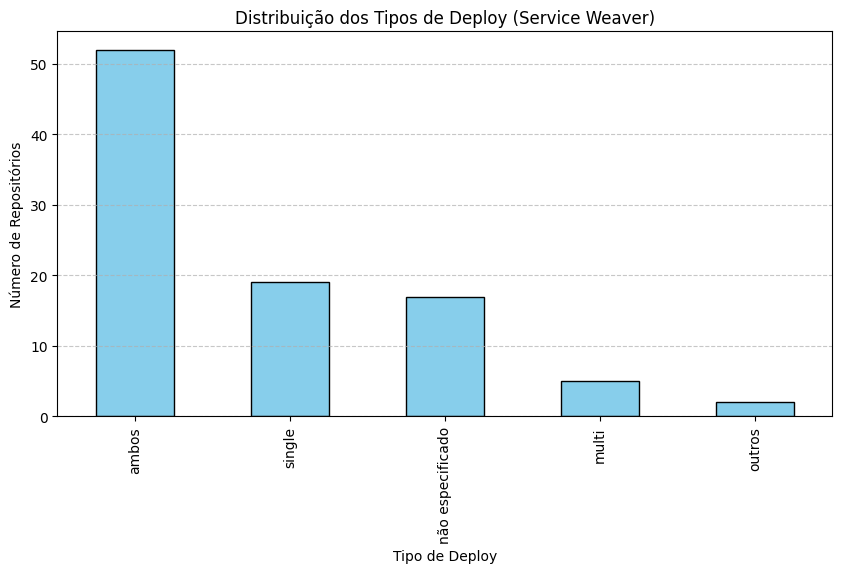

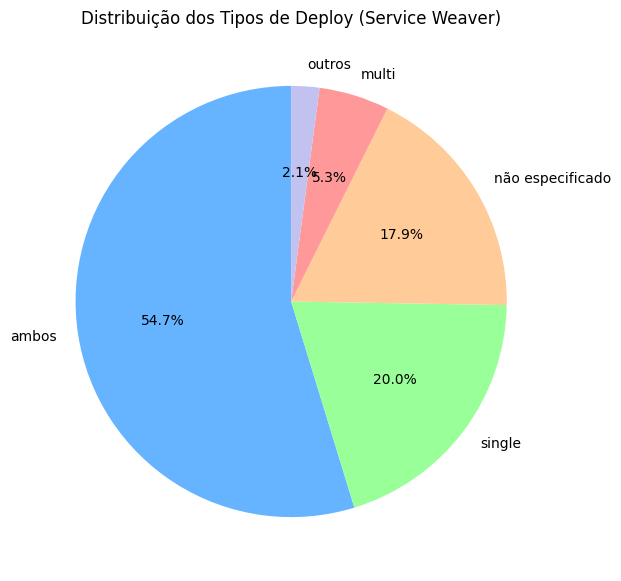

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(r"sw_out\results_summary.csv")


def classify_deploy(deploy_hints):
    if pd.isna(deploy_hints) or deploy_hints.strip() == "":
        return "não especificado"

    hints = [h.strip().lower() for h in deploy_hints.split(",")]

    has_single = "single" in hints
    has_multi = "multi" in hints

    if has_single and has_multi:
        return "ambos"
    elif has_single:
        return "single"
    elif has_multi:
        return "multi"
    else:
        return "outros"



df["tipo_deploy"] = df["deploy_hints"].apply(classify_deploy)

counts = df["tipo_deploy"].value_counts()

def has_hint(h, x):
    return isinstance(x, str) and h in x.lower()

extra_counts = {
    "gke": df["deploy_hints"].apply(lambda x: has_hint("gke", x)).sum(),
    "kube": df["deploy_hints"].apply(lambda x: has_hint("kube", x)).sum(),
    "ssh": df["deploy_hints"].apply(lambda x: has_hint("ssh", x)).sum(),
}

print("Contagem principal de tipos de deploy:")
print(counts, "\n")
print("Contagem de deploys específicos:")
print(extra_counts)

plt.figure(figsize=(10,5))
counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribuição dos Tipos de Deploy (Service Weaver)")
plt.xlabel("Tipo de Deploy")
plt.ylabel("Número de Repositórios")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

plt.figure(figsize=(7,7))
counts.plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=["#66b3ff","#99ff99","#ffcc99","#ff9999","#c2c2f0"])
plt.title("Distribuição dos Tipos de Deploy (Service Weaver)")
plt.ylabel("")
plt.show()
